In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/dataset.csv")
print(df)

      gender  age    height      weight family_history_with_overweight  \
0     Female   21  1.620000   64.000000                            yes   
1     Female   21  1.520000   56.000000                            yes   
2       Male   23  1.800000   77.000000                            yes   
3       Male   27  1.800000   87.000000                             no   
4       Male   22  1.780000   89.800000                             no   
...      ...  ...       ...         ...                            ...   
2106  Female   21  1.710730  131.408528                            yes   
2107  Female   22  1.748584  133.742943                            yes   
2108  Female   23  1.752206  133.689352                            yes   
2109  Female   24  1.739450  133.346641                            yes   
2110  Female   24  1.738836  133.472641                            yes   

     caloric_food  vegetables  number_meals  food_between_meals smoke  water  \
0              no           2  

In [ ]:
df.head()

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation,obesity_level
0,Female,21,1.62,64.0,yes,no,2,3.0,2,no,2,no,0,1,1,public_transportation,2
1,Female,21,1.52,56.0,yes,no,3,3.0,2,yes,3,yes,3,0,2,public_transportation,2
2,Male,23,1.80,77.0,yes,no,2,3.0,2,no,2,no,2,1,3,public_transportation,2
3,Male,27,1.80,87.0,no,no,3,3.0,2,no,2,no,2,0,3,walking,3
4,Male,22,1.78,89.8,no,no,2,1.0,2,no,2,no,0,0,2,public_transportation,4


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: >, <Axes: >]], dtype=object)

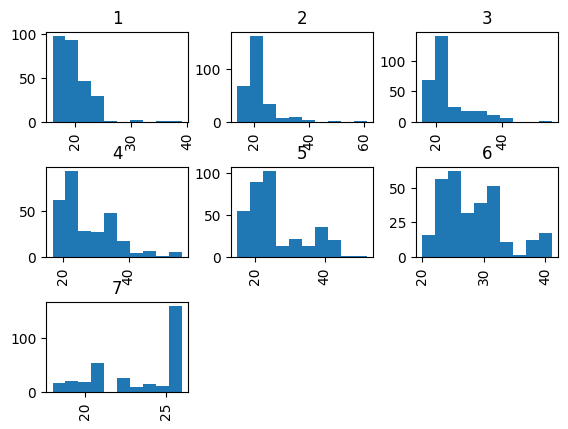

In [ ]:
df.hist(column="age", by="obesity_level", bins=10)

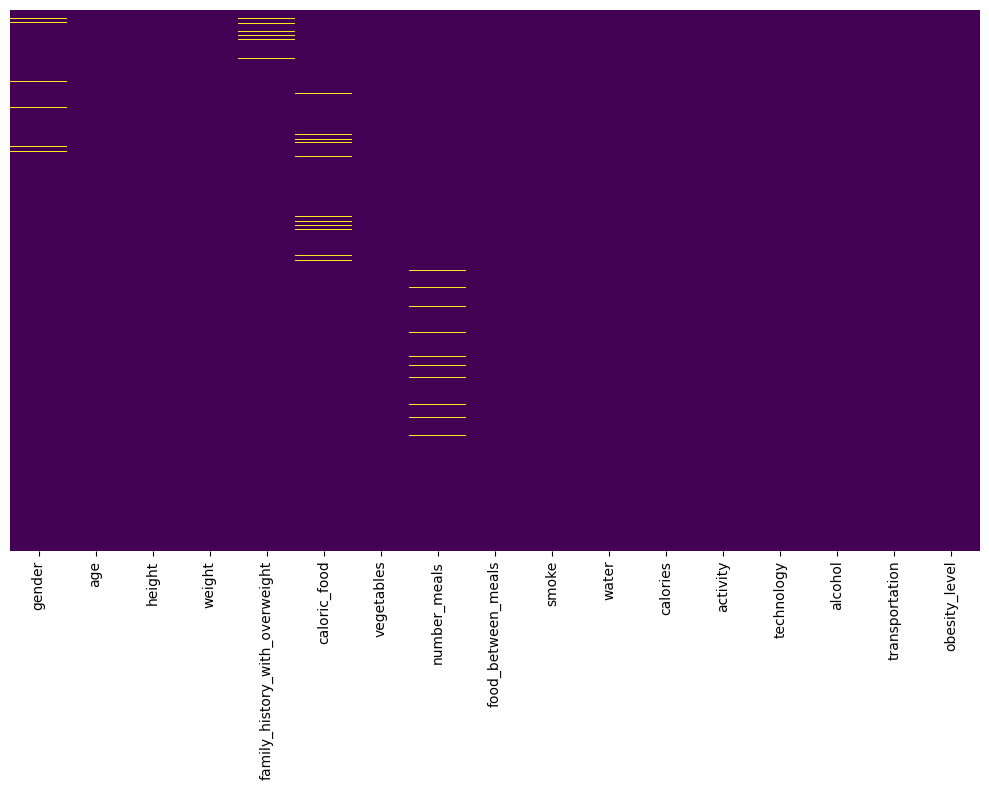

In [ ]:
#Visualizing - NaN values - NULL
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(10,8))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

<Axes: xlabel='caloric_food'>

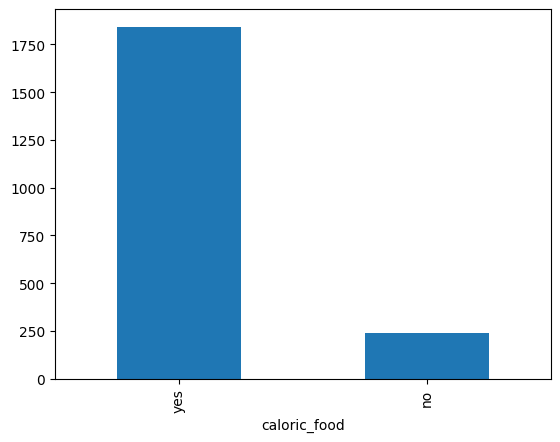

In [ ]:
df.caloric_food.value_counts().plot.bar()

obesity_level
5    351
7    324
6    297
3    290
4    290
2    287
1    272
Name: count, dtype: int64


<Axes: xlabel='obesity_level'>

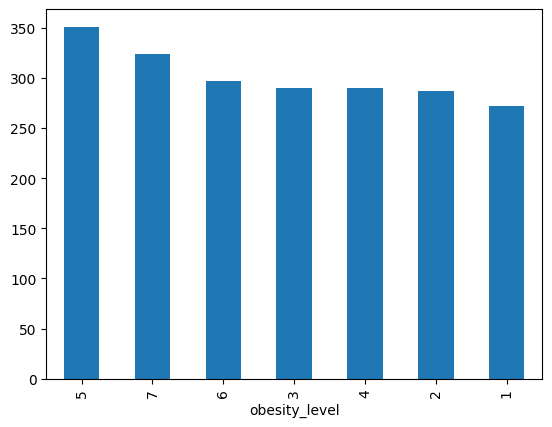

In [ ]:
print(df.obesity_level.value_counts())
df.obesity_level.value_counts().plot.bar()

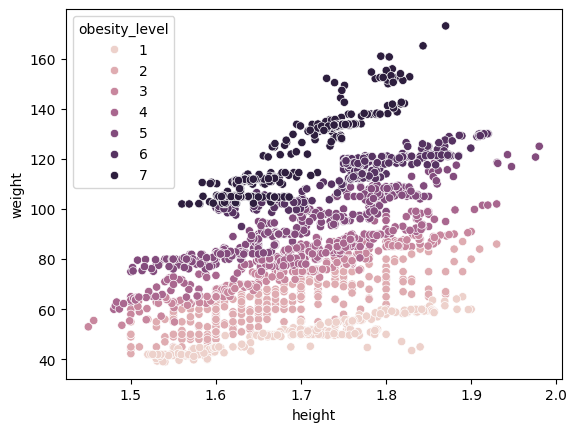

In [ ]:
sns.scatterplot(x='height', y='weight', data=df,
               hue='obesity_level')
plt.show()

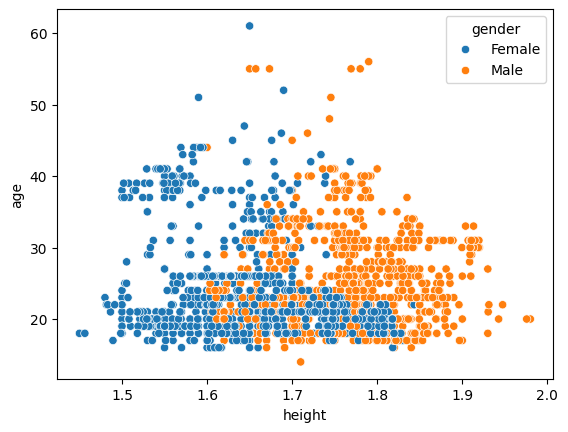

In [ ]:
sns.scatterplot(x='height', y='age', data=df,
               hue='gender')
plt.show()

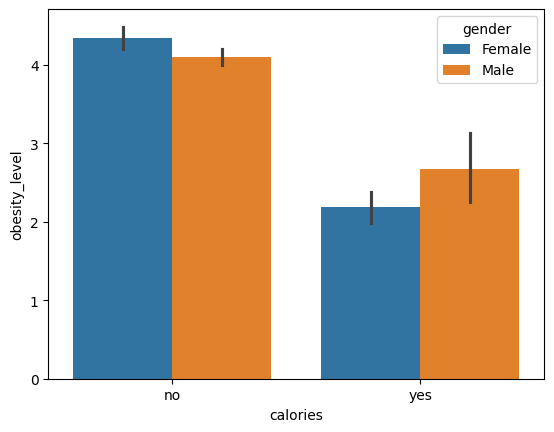

In [ ]:
sns.barplot(x='calories',y='obesity_level', data=df,
            hue='gender')

plt.show()

<Axes: ylabel='Density'>

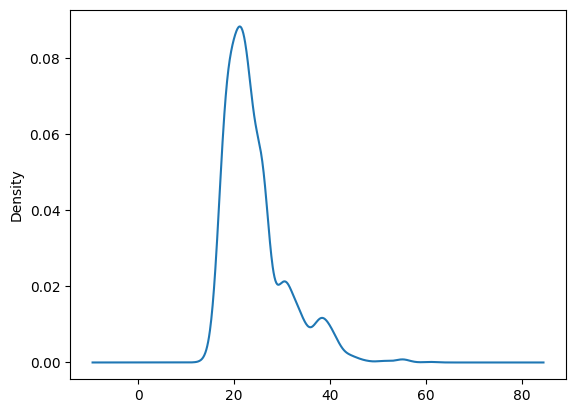

In [ ]:
df.age.plot.density()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC as SVM
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

In [ ]:
df.gender = LE.fit_transform(df.gender)
df.family_history_with_overweight = LE.fit_transform(df.family_history_with_overweight)
df.caloric_food = LE.fit_transform(df.caloric_food)
df.smoke = LE.fit_transform(df.smoke)
df.calories = LE.fit_transform(df.calories)
df.transportation = LE.fit_transform(df.transportation)

In [ ]:
x = df.drop('obesity_level', axis=1)
y = df['obesity_level']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.head()

,gender,age,height,weight,family_history_with_overweight,caloric_food,vegetables,number_meals,food_between_meals,smoke,water,calories,activity,technology,alcohol,transportation
1387,0,43,1.582523,81.919454,1,1,3,NaN,2,0,2,0,1,0,1,0
453,0,18,1.620000,50.000000,0,1,3,3.0,2,0,1,0,0,0,2,0
1954,0,25,1.685482,113.451224,1,1,3,3.0,2,0,3,0,0,0,2,3
1752,1,27,1.828276,120.872294,1,1,3,3.0,2,0,3,0,1,1,2,3
1137,0,19,1.562434,70.442775,1,0,3,3.0,2,0,2,0,1,1,1,3


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_train.dtypes)
print(y_train.dtypes)

(1477, 16)
(1477,)
gender                              int64
age                                 int64
height                            float64
weight                            float64
family_history_with_overweight      int64
caloric_food                        int64
vegetables                          int64
number_meals                      float64
food_between_meals                  int64
smoke                               int64
water                               int64
calories                            int64
activity                            int64
technology                          int64
alcohol                             int64
transportation                      int64
dtype: object
int64


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming x_train and x_test are your input features and y_train, y_test are your target labels

# Step 1: Identify missing values
# Assuming x_train is your training data containing NaN values

# Step 2: Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with mean
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Step 3: Fit the model
model = DecisionTreeClassifier(random_state=0, max_depth=3)
model.fit(x_train_imputed, y_train)

# Step 4: Predict and evaluate
pred = model.predict(x_test_imputed)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,pred)*100)

              precision    recall  f1-score   support

           1       0.83      0.58      0.68        83
           2       0.53      0.43      0.47        98
           3       0.45      0.55      0.50        92
           4       0.00      0.00      0.00        89
           5       0.43      0.91      0.58       107
           6       0.88      0.78      0.83        76
           7       1.00      1.00      1.00        89

    accuracy                           0.61       634
   macro avg       0.59      0.61      0.58       634
weighted avg       0.57      0.61      0.57       634

[[48 31  4  0  0  0  0]
 [10 42 41  0  5  0  0]
 [ 0  6 51  0 35  0  0]
 [ 0  1 15  0 73  0  0]
 [ 0  0  2  0 97  8  0]
 [ 0  0  0  0 17 59  0]
 [ 0  0  0  0  0  0 89]]
accuracy: 60.88328075709779


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')  # Replace NaN values with mean
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

model_rf = RandomForestClassifier(class_weight='balanced', random_state=1, max_depth=5, n_estimators=10, max_features=1)
model_rf.fit(x_train_imputed, y_train)

pred = model_rf.predict(x_test_imputed)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy * 100)
print(classification_report(y_test, pred))

Accuracy: 63.40694006309149
              precision    recall  f1-score   support

           1       0.59      0.73      0.66        83
           2       0.62      0.49      0.55        98
           3       0.57      0.43      0.49        92
           4       0.62      0.58      0.60        89
           5       0.60      0.39      0.47       107
           6       0.62      0.92      0.74        76
           7       0.75      1.00      0.86        89

    accuracy                           0.63       634
   macro avg       0.63      0.65      0.63       634
weighted avg       0.63      0.63      0.62       634



In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,pred)*100)

accuracy: 63.40694006309149


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace NaN values with mean
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

model_ada = AdaBoostClassifier(learning_rate=0.01)
model_ada.fit(x_train_imputed, y_train)

pred = model_ada.predict(x_test_imputed)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy * 100)
print(classification_report(y_test, pred))


Accuracy: 32.80757097791798
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        83
           2       0.38      0.53      0.44        98
           3       0.45      0.55      0.50        92
           4       0.00      0.00      0.00        89
           5       0.27      0.98      0.43       107
           6       0.00      0.00      0.00        76
           7       0.00      0.00      0.00        89

    accuracy                           0.33       634
   macro avg       0.16      0.30      0.20       634
weighted avg       0.17      0.33      0.21       634



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


imputer = SimpleImputer(strategy='mean')  # Replace NaN values with mean
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)


model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(x_train_scaled, y_train)

pred = model_svm.predict(x_test_scaled)
accuracy = accuracy_score(y_test, pred)
print("SVM Accuracy:", accuracy * 100)
print(classification_report(y_test, pred))


SVM Accuracy: 93.84858044164038
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        83
           2       0.92      0.83      0.87        98
           3       0.87      0.90      0.89        92
           4       0.94      0.93      0.94        89
           5       0.97      0.93      0.95       107
           6       0.95      1.00      0.97        76
           7       1.00      1.00      1.00        89

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are your input features and y_train, y_test are your target labels

# Step 1: Identify missing values
# Assuming x_train is your training data containing NaN values

# Step 2: Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with mean
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Step 3: Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Step 4: Fit the model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(x_train_scaled, y_train)

# Step 5: Predict and evaluate
pred = model_lr.predict(x_test_scaled)
accuracy = accuracy_score(y_test, pred)
print("Logistic Regression Accuracy:", accuracy * 100)
print(classification_report(y_test, pred))


Logistic Regression Accuracy: 86.43533123028391
              precision    recall  f1-score   support

           1       0.90      0.98      0.94        83
           2       0.87      0.76      0.81        98
           3       0.75      0.75      0.75        92
           4       0.79      0.80      0.79        89
           5       0.89      0.83      0.86       107
           6       0.87      0.99      0.93        76
           7       0.98      1.00      0.99        89

    accuracy                           0.86       634
   macro avg       0.86      0.87      0.87       634
weighted avg       0.86      0.86      0.86       634



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Assuming x_train and x_test are your input features and y_train, y_test are your target labels

# Step 1: Identify missing values
# Assuming x_train is your training data containing NaN values

# Step 2: Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with mean
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Step 3: Fit the model
model_knn = KNeighborsClassifier()
model_knn.fit(x_train_imputed, y_train)

# Step 4: Predict and evaluate
pred = model_knn.predict(x_test_imputed)
accuracy = accuracy_score(y_test, pred)
print("KNN Accuracy:", accuracy * 100)
print(classification_report(y_test, pred))

KNN Accuracy: 83.4384858044164
              precision    recall  f1-score   support

           1       0.80      0.93      0.86        83
           2       0.77      0.51      0.61        98
           3       0.70      0.87      0.78        92
           4       0.80      0.75      0.77        89
           5       0.88      0.93      0.90       107
           6       0.96      0.88      0.92        76
           7       0.96      1.00      0.98        89

    accuracy                           0.83       634
   macro avg       0.84      0.84      0.83       634
weighted avg       0.84      0.83      0.83       634



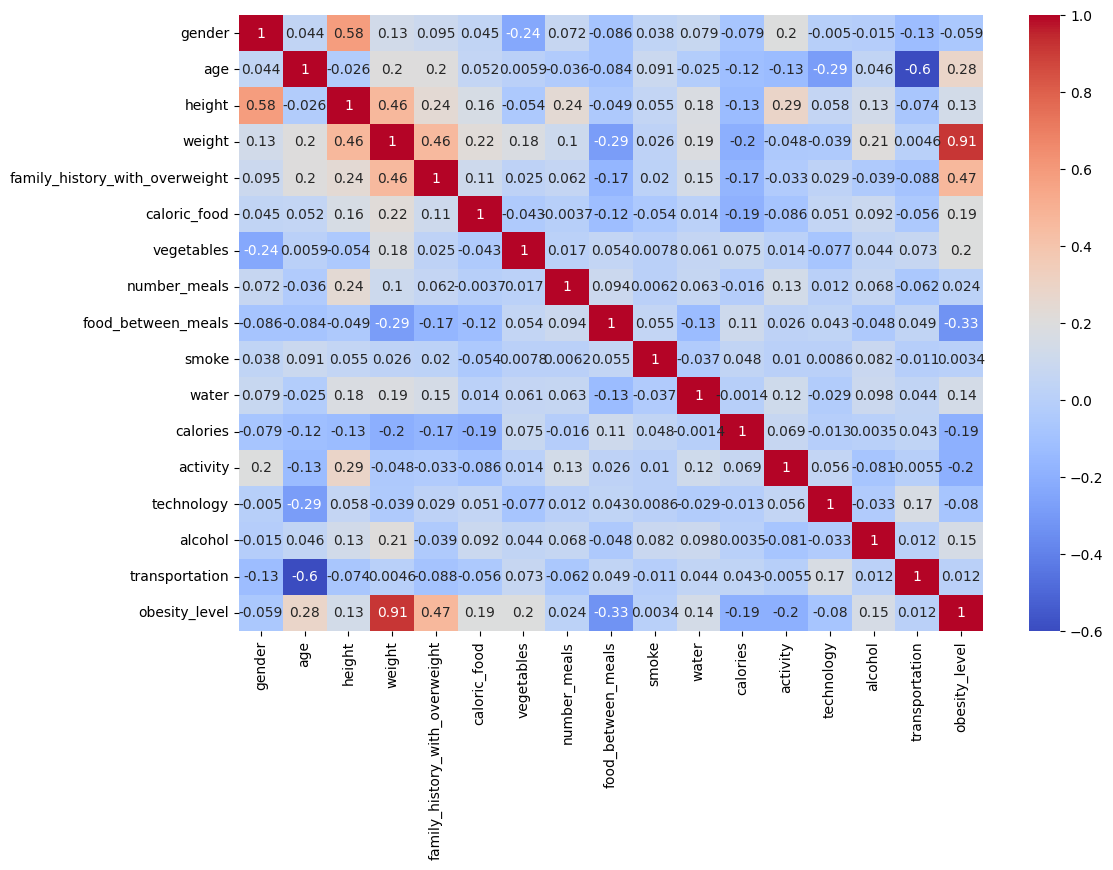

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()